# Gamestop and Tesla Stock Exercise
This project is inspired by the IBM Data Science Professional certification I have completed through Coursera. The course covered Webscraping, so I endeavoured to code up something to show us how the stock prices of these two companies varied during some of their most interesting periods. 

First, its important to know what "short selling" is. Short selling is how you make money if the stock decreases. An investor borrows a stock, sells the stock, and then repurchases it to return it to the lender.  Typically stocks fall faster than they rise, so you can make a profit more quickly. Usually, experienced investors such as hedge funds partake in short selling. One problem is if the stock price increases, the investor can lose money.

Gamestop was in dire straits towards the end of 2020, probably as a result of the COVID-19 pandemic. Users of the subreddit /r/Wallstreetbets decided to try game the system, and bought the stock en masse. In doing so, the price of the stock surged due to the extreme demand. This caused billions in losses for hedge fund managers, who has short sold their Gamestop Stock. The event serves as an interesting case study in how the markets can be manipulted through organised efforts, and is a good example of a "meme stock". 

The other company we're looking at here is Tesla, best known for producing electric cars and their controversial billionaire CEO Elon Musk. Tesla was tageted by short sellers a few years back. However, the stocks continued to rise against the fundamental understandings of how the market should work.   

In [1]:
#Install Packages
!pip -q install pandas==1.3.3
!pip -q install requests==2.26.0
!pip -q install bs4
!pip -q install html5lib==1.1
!pip -q install lxml
!pip -q install plotly==5.3.1
!pip -q install yfinance

#Load Packages or Modules
import yfinance as yf #This module will help us acquire realtime data
import pandas as pd  #Pandas for data manipulation
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import numpy as np
import matplotlib.pyplot as plt

# Using requests.get() and BeautifulSoup

Here we want to get the data from the websites and convert them into text format. We first define objects as the url in string formats. 
Then we use requests to pull the data from that webpage and save it in text format. 

In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [74]:
#URL link to Tesla inc. (TSLA) history on Yahoo!Finance. Date range is set to the period of interest: start="2020-01-15", end="2020-02-15"
url1 = "https://finance.yahoo.com/quote/TSLA/history?period1=1579046400&period2=1581724800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"
#URL link to GameStop Corp. (GME) history on Yahoo!Finance. Date range is set to the period of interest: "2021-01-10", end="2021-03-10"
url2 = "https://finance.yahoo.com/quote/GME/history?period1=1610236800&period2=1615334400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true"

tsla_data = requests.get(url1, headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}).text
gme_data = requests.get(url2, headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}).text

#option to print and have a look at the data we scraped
#print(tsla_data)
#print(gme_data)

In [75]:
#Converting the saved txt to BeautifulSoup objects for Easier navigation of the data
tsla_soup = BeautifulSoup(tsla_data, "html5lib")
gme_soup = BeautifulSoup(gme_data, "html5lib")

Beautiful soup will store our html text as a data tree, making moving around the webpage easier

Next we need to extract the data from the table on the webpage into a table in our code. We'll use pandas to build a DataFrame in which we'll keep the data. 

In [76]:
tsla_df = pd.DataFrame(columns= ["Date", "Open", "High", "Low", "Close", "Volume"])
gme_df = pd.DataFrame(columns= ["Date", "Open", "High", "Low", "Close", "Volume"])

We'll now execute a for loop over the data in the BeautifulSoup objects and extract the tabulated data. It'll then be transposed into our Dataframes

In [77]:
# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in tsla_soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    tsla_df = tsla_df.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
    
for row in gme_soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    gme_df = gme_df.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)
gme_df    

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Mar 09, 2021",54.43,62.46,52.13,61.72,"156,397,200",61.72
1,"Mar 08, 2021",38.72,52.72,36.53,48.63,"254,262,400",48.63
2,"Mar 05, 2021",32.04,37.88,31.88,34.44,"122,934,800",34.44
3,"Mar 04, 2021",31.25,36.97,28.83,33.09,"130,427,600",33.09
4,"Mar 03, 2021",30.63,31.94,28.28,31.05,"77,095,600",31.05
5,"Mar 02, 2021",29.23,33.30,28.05,29.55,"135,132,000",29.55
6,"Mar 01, 2021",26.14,33.50,24.99,30.10,"199,176,000",30.10
7,"Feb 26, 2021",29.36,35.72,21.50,25.43,"368,776,800",25.43
8,"Feb 25, 2021",42.39,46.17,25.25,27.18,"601,235,200",27.18
9,"Feb 24, 2021",11.18,22.93,11.18,22.93,"332,446,800",22.93


Now we have our data, we'll limit the data to the date ranges we're interested in. 

C:\Users\skrim\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\skrim\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\skrim\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


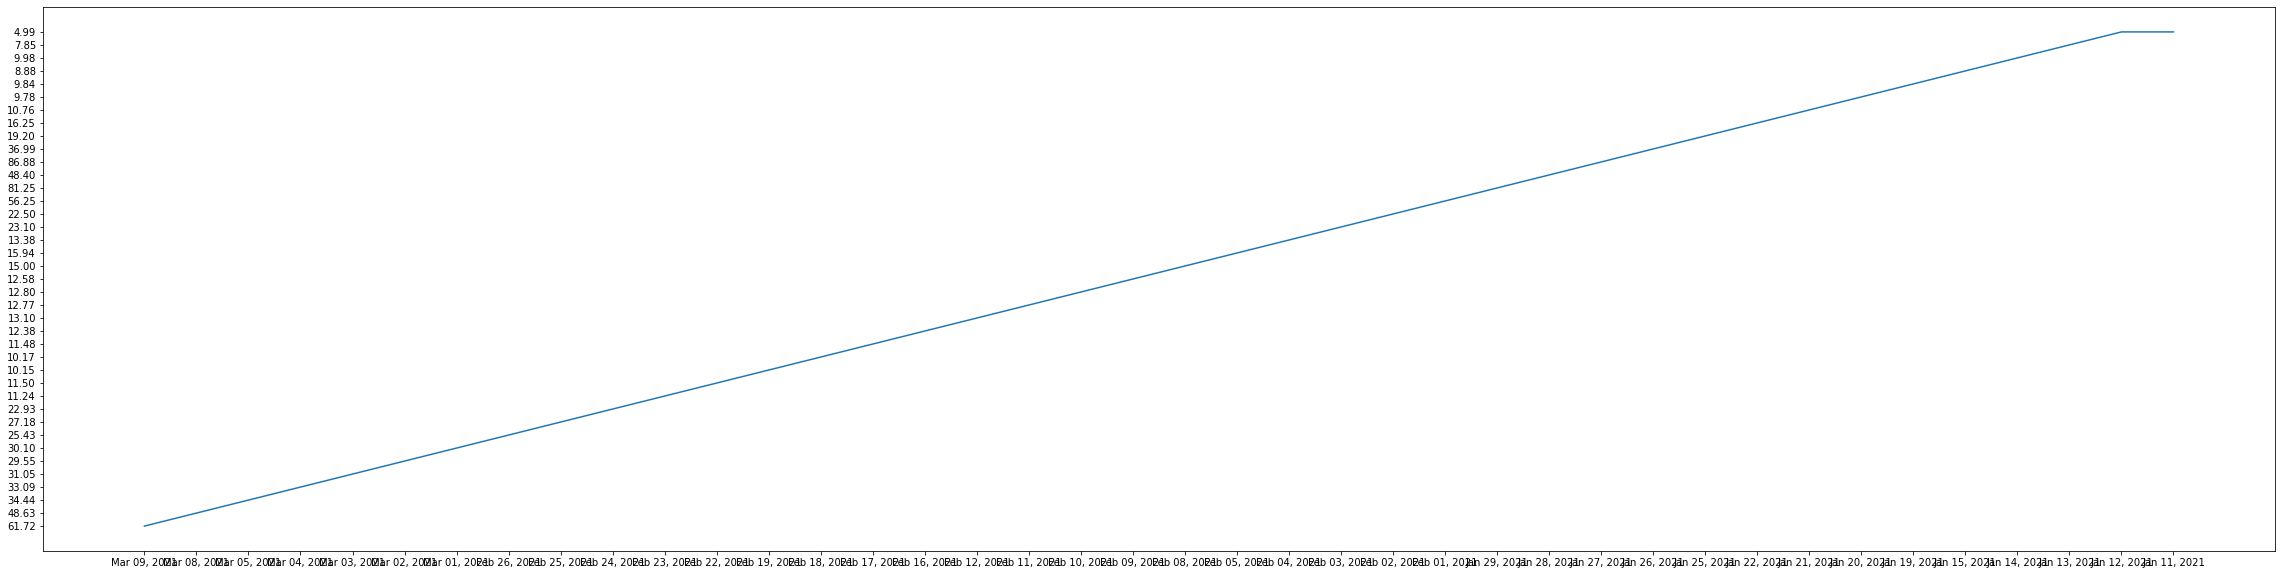

In [78]:
plt.figure(figsize=(40,10))
plt.plot((gme_df["Date"]), gme_df["Adj Close"])

### Requests only option

Follwing the example given by Asep Saputra at the follwing link: https://medium.com/codestorm/scrape-yahoo-finance-using-pandas-d52f502b7289 we can achieve a similar result using only get requests. However, the returned object is not "plot ready" and requires a couple of extra modifications to allow us to visualise the data. Below, I've done this for the GameStop stock only. 

In [27]:
def getdata(url):
 r = requests.get(url,headers ={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
 data = pd.read_html(r.text)
 return data

historiscal_url= f'https://finance.yahoo.com/quote/GME/history?p=GME'
historiscal_data = getdata(historiscal_url)
data = historiscal_data[0]
data

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Aug 04, 2023",20.95,21.89,20.89,20.98,20.98,2400500
1,"Aug 03, 2023",20.88,21.18,20.74,20.93,20.93,1318700
2,"Aug 02, 2023",21.15,21.15,20.34,20.83,20.83,2625800
3,"Aug 01, 2023",21.95,22.00,21.26,21.50,21.50,2567100
4,"Jul 31, 2023",22.00,22.38,21.85,22.20,22.20,1973400
...,...,...,...,...,...,...,...
96,"Mar 17, 2023",16.62,16.72,15.92,16.60,16.60,5105500
97,"Mar 16, 2023",16.00,16.77,15.53,16.76,16.76,4083000
98,"Mar 15, 2023",16.50,16.69,15.70,15.95,15.95,4541500
99,"Mar 14, 2023",17.37,17.41,16.40,16.91,16.91,3077400


#### There's unwanted data at the bottom, so we'll remove that! 

In [28]:
data = data.iloc[:-1 , :]
data

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Aug 04, 2023",20.95,21.89,20.89,20.98,20.98,2400500
1,"Aug 03, 2023",20.88,21.18,20.74,20.93,20.93,1318700
2,"Aug 02, 2023",21.15,21.15,20.34,20.83,20.83,2625800
3,"Aug 01, 2023",21.95,22.00,21.26,21.50,21.50,2567100
4,"Jul 31, 2023",22.00,22.38,21.85,22.20,22.20,1973400
...,...,...,...,...,...,...,...
95,"Mar 20, 2023",16.65,17.27,16.25,16.87,16.87,4463700
96,"Mar 17, 2023",16.62,16.72,15.92,16.60,16.60,5105500
97,"Mar 16, 2023",16.00,16.77,15.53,16.76,16.76,4083000
98,"Mar 15, 2023",16.50,16.69,15.70,15.95,15.95,4541500


#### Now that's removed, we'll check the data types stored in the Dataframe

In [29]:
data = data[data["Open"].str.contains("Dividend") == False]
data.dtypes

Date           object
Open           object
High           object
Low            object
Close*         object
Adj Close**    object
Volume         object
dtype: object

#### As you can see, they're stored as objects. Not ideal. We ideally want these as floats! Let's change them below.

In [30]:
data['Date'] = pd.to_datetime(data['Date'])
numeric_columns = list(data.columns)[1::]
for column_name in numeric_columns:
    data[column_name] = data[column_name].str.replace(',', '')
    data[column_name] = data[column_name].astype(np.float64)
data.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close*                float64
Adj Close**           float64
Volume                float64
dtype: object

#### Now we can proceed to plot the data if we wish!

# Using yfinance

Alternatively we can use the yfinance API to attain the data using the Ticker method. This is a little less fiddly, but it is depenedent on all packages being up to date and Yahoo!Finance not massively overhauling their back end!

In [16]:
#Using yfinance we can directly access information about the companies in a very pythonic fashion!
tsla= yf.Ticker("TSLA")
gme= yf.Ticker("GME")

#Uncomment one at a time to get some information on the companies
#tsla.info
#gme.info

From the Ticker we can plot the historcial varience of the stock price of each of these companies. We'll plot up the data from the periods of interest, for Gamestop this will be the period from the 10th of January 2021 (suggested start date from Wikipedia: https://en.wikipedia.org/wiki/GameStop_short_squeeze) through to the 10th of March 2021. 

In [17]:
gme_short_range = gme.history(start="2021-01-10", end="2021-03-10")
tsla_short_range = tsla.history(start="2020-01-15", end="2020-02-15")
#it's useful here to reset the indices to make plotting a bit easier
tsla_short_range.reset_index(inplace=True)
gme_short_range.reset_index(inplace=True)
#Uncomment to see the table heads
#tsla_short_range.head()
#gme_short_range.head()

We can now plot the data over these time periods and see the rise in the stock prices

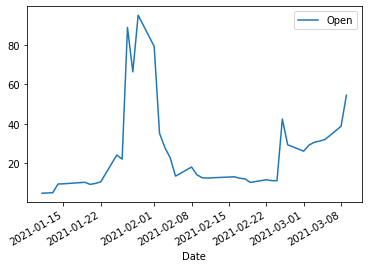

In [82]:
gme_short_range.plot(x="Date", y="Open")

#Matplotlib option
#plt.plot(gme_short_range["Date"], gme_short_range["Open"])

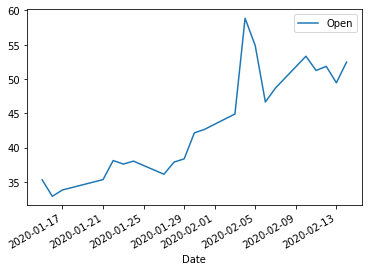

In [19]:
tsla_short_range.plot(x="Date", y="Open")
#Matplotlib option
#plt.plot(tsla_short_range["Date"], tsla_short_range["Open"])

# Current Prices

Now we've had a look at these intersting periods, lets have a look at the current stock prices for these two companies. We'll again use yfinance to do this, as there's a handy inbuilt "period" argument we can use to display the most recent data from a time span of our choosing. In the example below, we'll have a look at the last three months.  

In [21]:
gme_current = gme.history(period="3mo")
tsla_current = tsla.history(period="3mo")
tsla_current.reset_index(inplace=True)
gme_current.reset_index(inplace=True)

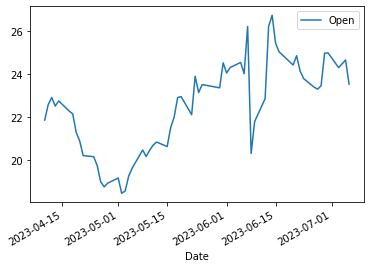

In [22]:
gme_current.plot(x="Date", y="Open")

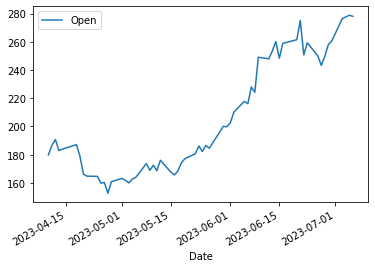

In [23]:
tsla_current.plot(x="Date", y="Open")

We're also going to print the maximum and minimum values attained in the time frame we have selected

In [24]:
print("Highest open price for Tesla in the last 3 months: $", tsla_current["Open"].max())
print("Lowest open price for Tesla in the last 3 months: $", tsla_current["Open"].min())
print("Highest open price for Gamestop in the last 3 months: $", gme_current["Open"].max())
print("Lowest open price for Gamestop in the last 3 months: $", gme_current["Open"].min())


Highest open price for Tesla in the last 3 months: $ 278.82000732421875
Lowest open price for Tesla in the last 3 months: $ 152.63999938964844
Highest open price for Gamestop in the last 3 months: $ 26.719999313354492
Lowest open price for Gamestop in the last 3 months: $ 18.450000762939453


We can also do some comparisons between the rows of data. Below, we're observing how the open price of the stock compare to the previous day using the .diff() method provided by pandas. We can then plot the data and observe the overall trend in open prices over the past period

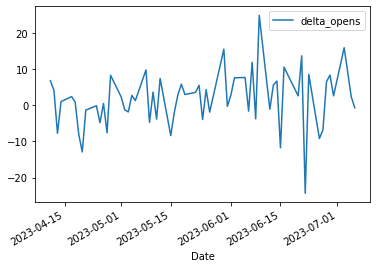

In [66]:
tsla_current['delta_opens'] = tsla_current.Open.diff()
tsla_current.plot(x="Date", y="delta_opens")

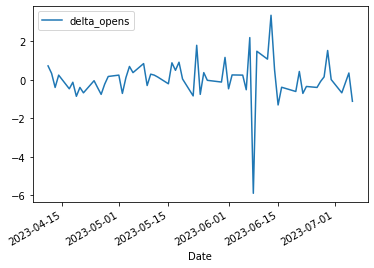

In [65]:
gme_current["delta_opens"]= gme_current.Open.diff()
gme_current.plot(x="Date", y="delta_opens")

https://blog.jovian.com/web-scraping-yahoo-finance-using-python-7c4612fab70c#49a4
https://stackoverflow.com/questions/63400380/how-to-extract-a-table-from-yahoo-finance
https://medium.com/codestorm/scrape-yahoo-finance-using-pandas-d52f502b7289